# Customer Service Request Analysis

In [1]:
# importing libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
dataframe1=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [5]:
dataframe1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
dataframe1.shape

(364558, 53)

In [6]:
dataframe1.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [7]:
dataframe1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
dataframe1['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [9]:
dataframe1['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [10]:
#Converting data into correct datetime format
dataframe1['Created Date']=pd.to_datetime(dataframe1['Created Date'])
dataframe1['Closed Date']=pd.to_datetime(dataframe1['Closed Date'])

In [11]:
#Creating the new column that consist the amount of time taken to resolve the complaint
dataframe1["Request_Closing_Time"]=(dataframe1["Closed Date"]-dataframe1["Created Date"])

Request_Closing_Time=[]
for x in (dataframe1["Closed Date"]-dataframe1["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
dataframe1["Request_Closing_Time"]=Request_Closing_Time

<function matplotlib.pyplot.show(close=None, block=None)>

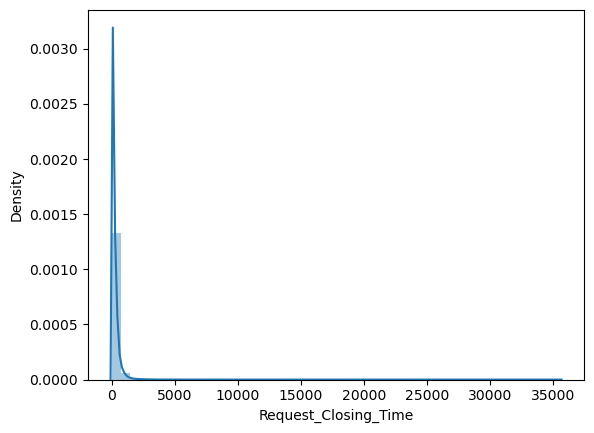

In [12]:
#Distribution plot for request closing time
#sns.distplot(dataframe1['Request_Closing_Time'])
#plt.show
sns.distplot(dataframe1['Request_Closing_Time'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

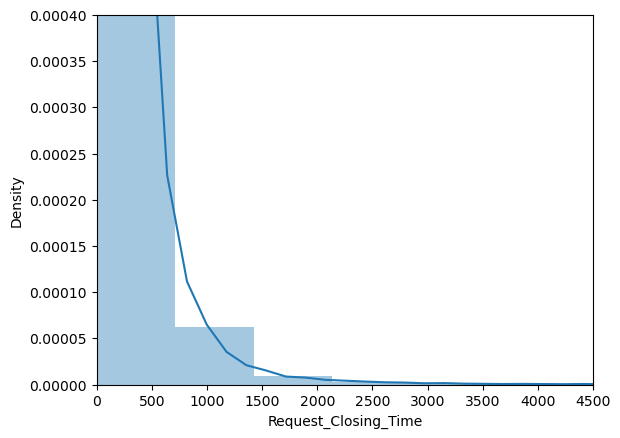

In [14]:
#Distribution plot for request closing time
sns.distplot(dataframe1['Request_Closing_Time'])
plt.xlim((0,4500))
plt.ylim((0,0.0004))
plt.show

In [15]:
Citywisecomplaints = pd.DataFrame({'count':dataframe1.groupby(['Complaint Type', 'City']).size()}).reset_index()

Citywisecomplaints

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
772,Vending,STATEN ISLAND,25
773,Vending,SUNNYSIDE,15
774,Vending,WHITESTONE,1
775,Vending,WOODHAVEN,6


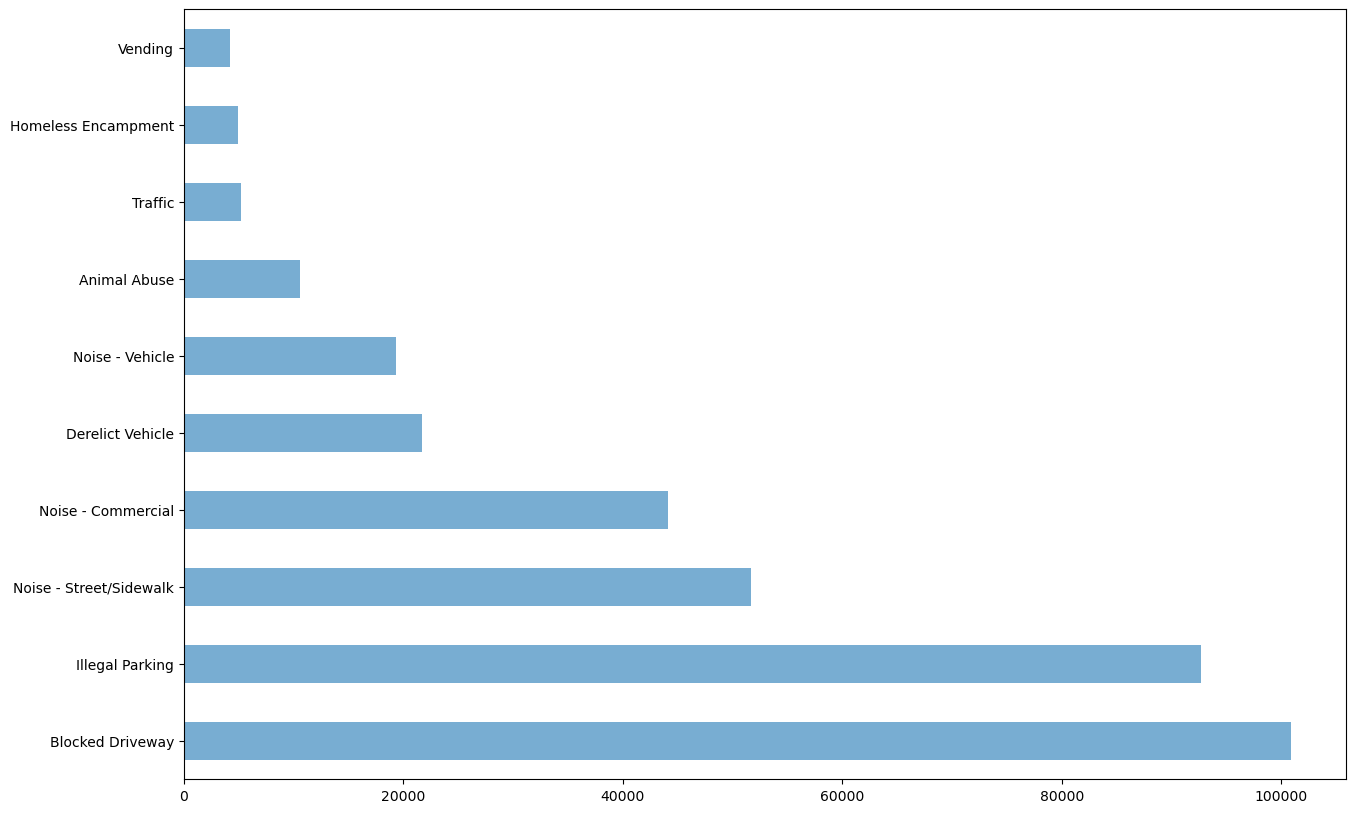

In [16]:
#dataframe1['Complaint Type'].value_counts().head(10).plot(kind ='barh',alpha =0.6,figsize=(5,5));
dataframe1['Complaint Type'].value_counts().head(10).plot(kind='barh',alpha =0.6,figsize=(15,10));


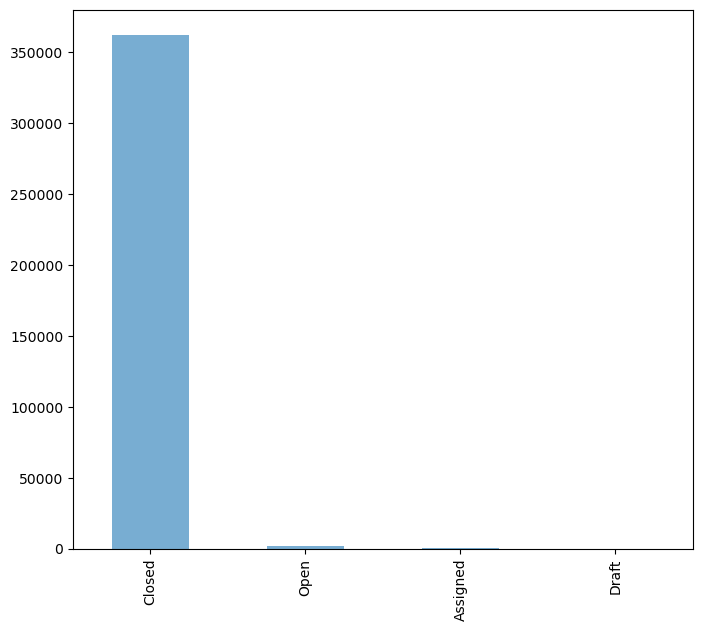

In [17]:
#Count plot to know the status of the requests


dataframe1['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(8,7))
plt.show()

In [18]:
#majoritycomplaints=dataframe1.dropna(subset=["Complaint Type"])
majoritycomplaints=dataframe1.groupby("Complaint Type")
ComplaintTypesorted = majoritycomplaints.size().sort_values(ascending = False)
ComplaintTypesorted = ComplaintTypesorted.to_frame('count').reset_index()

ComplaintTypesorted
ComplaintTypesorted.head(20)


,Complaint Type,count
0,Blocked Driveway,100881
1,Illegal Parking,92679
2,Noise - Street/Sidewalk,51692
3,Noise - Commercial,44109
4,Derelict Vehicle,21661
5,Noise - Vehicle,19352
6,Animal Abuse,10541
7,Traffic,5198
8,Homeless Encampment,4879
9,Vending,4192


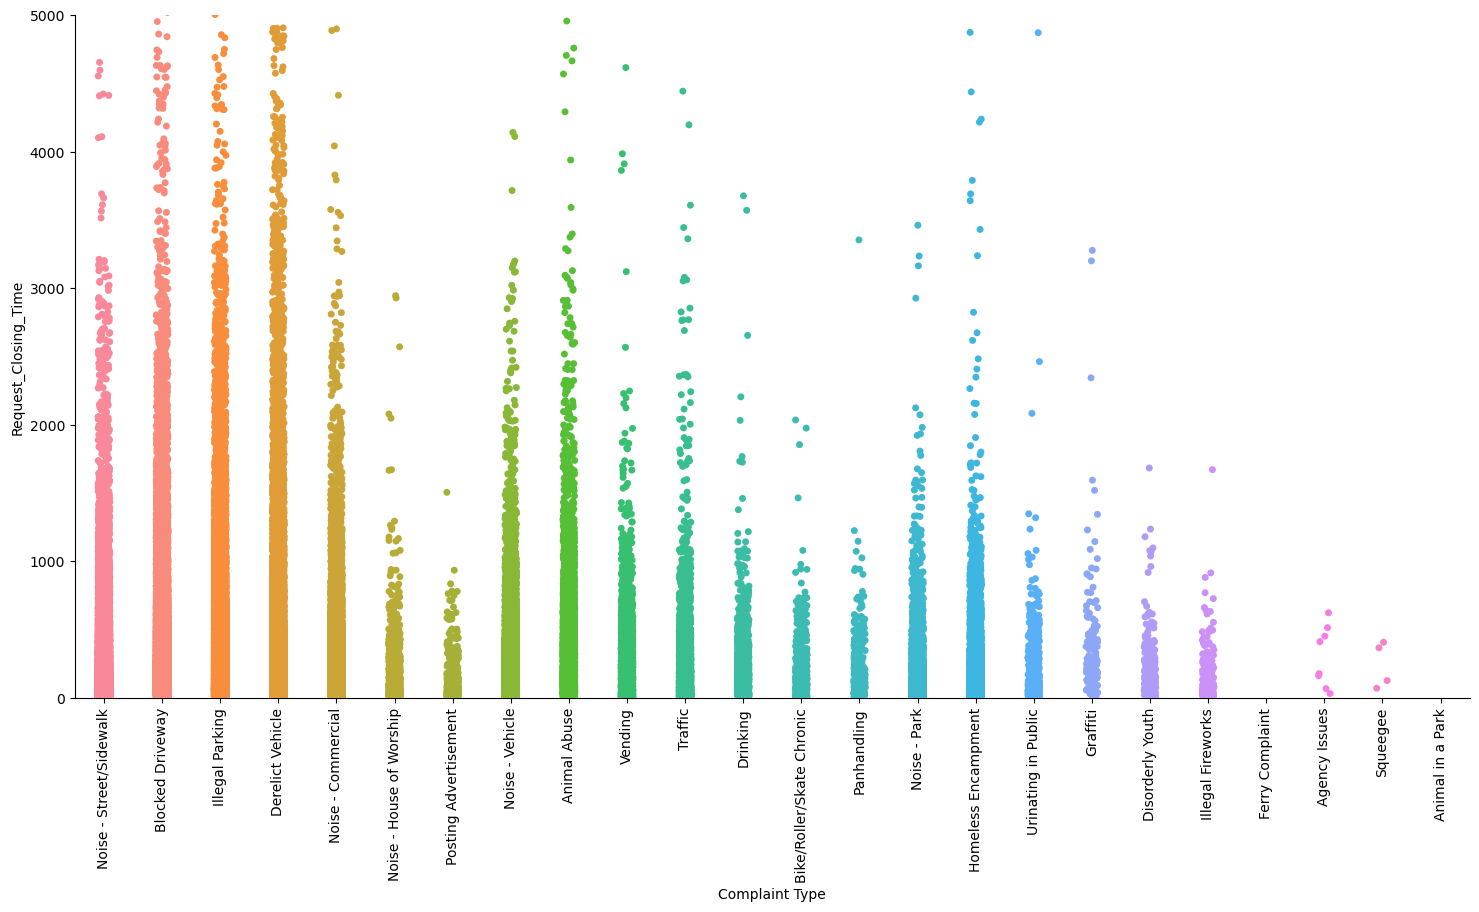

In [19]:
#Categorical scatter plot to understand which type of complaint are taking more time to get resolved
scatter=sns.catplot(x='Complaint Type', y='Request_Closing_Time', data=dataframe1)
scatter.fig.set_figwidth(20)
scatter.fig.set_figheight(8)
plt.xticks(rotation=90)
plt.ylim(0,5000)
plt.show()

In [20]:
#Request Closing Time for all location Type sorted in ascending Order
pd.DataFrame(dataframe1.groupby('Location Type')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,Request_Closing_Time
Location Type,
Subway Station,145.120000
Club/Bar/Restaurant,183.492218
House of Worship,190.052861
Store/Commercial,192.928792
Highway,204.372348
Park/Playground,206.594724
Bridge,229.458333
Street/Sidewalk,261.052945
Residential Building,267.260350


In [21]:
#Request Closing Time for all city sorted in ascending Order
pd.DataFrame(dataframe1.groupby('City')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,Request_Closing_Time
City,
ARVERNE,137.840605
ROCKAWAY PARK,139.602908
LITTLE NECK,155.031437
OAKLAND GARDENS,156.240167
BAYSIDE,160.062978
FAR ROCKAWAY,161.193068
NEW YORK,175.343723
FLUSHING,177.446478
FOREST HILLS,184.097636


In [22]:
dataframe1.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [23]:
dataframe1['City'].dropna(inplace=True)

In [24]:
dataframe1.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

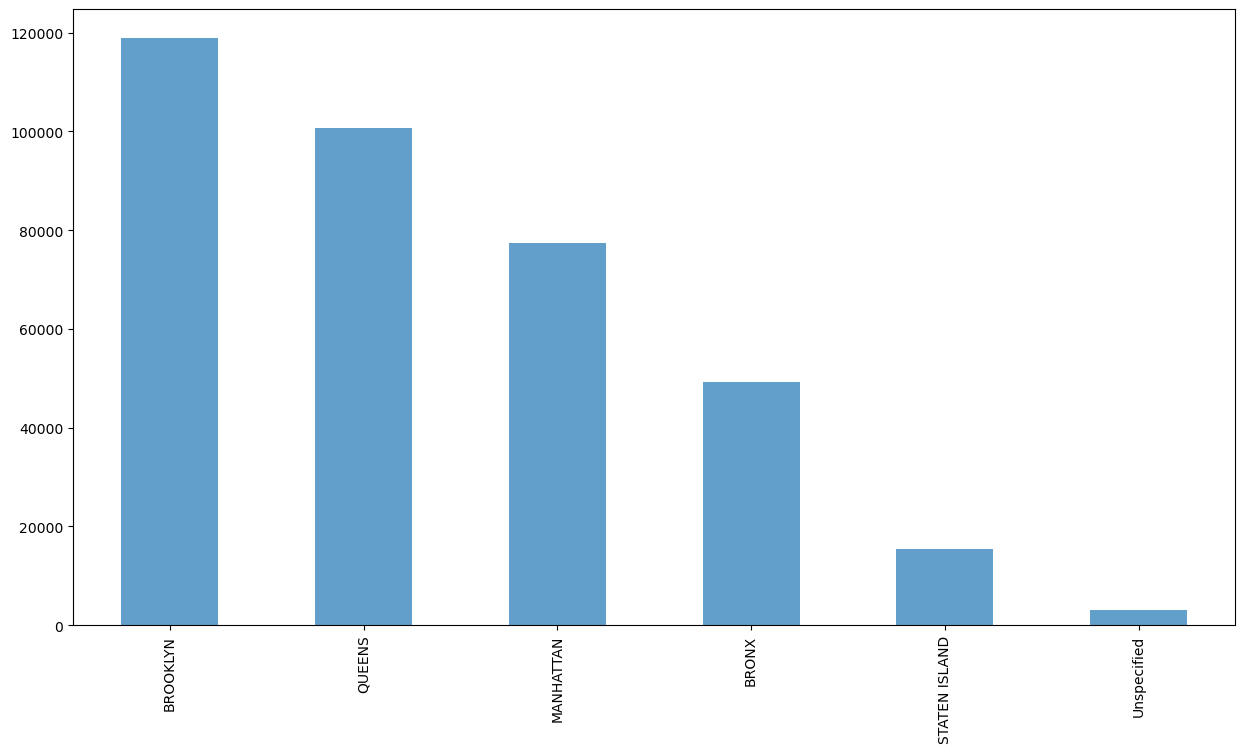

In [29]:
#Count Plot for Coloumn Borough
#plt.figure(figsize=(15,8))
dataframe1['Borough'].value_counts().plot(kind='bar', alpha=0.7, figsize=(15,8))
plt.show()

In [31]:
dataframe1['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [35]:
Complaints_Borough = pd.DataFrame({'count':dataframe1.groupby(['Complaint Type', 'Borough']).size()}).reset_index()

Complaints_Borough

,Complaint Type,Borough,count
0,Agency Issues,Unspecified,8
1,Animal Abuse,BRONX,1971
2,Animal Abuse,BROOKLYN,3191
3,Animal Abuse,MANHATTAN,1941
4,Animal Abuse,QUEENS,2640
...,...,...,...
114,Vending,BROOKLYN,575
115,Vending,MANHATTAN,2639
116,Vending,QUEENS,513
117,Vending,STATEN ISLAND,25


In [42]:
#Percentage of cases in each Borough
for x in dataframe1["Borough"].unique():
    print("Percentage of Request from ",x  ,(dataframe1["Borough"]==x).sum()/len(dataframe1)*100)

Percentage of Request from  MANHATTAN 21.24819644610734
Percentage of Request from  QUEENS 27.640594912195045
Percentage of Request from  BRONX 13.48729145979515
Percentage of Request from  BROOKLYN 32.60496272198114
Percentage of Request from  Unspecified 0.8113935231156633
Percentage of Request from  STATEN ISLAND 4.207560936805666


In [47]:
dataframe1.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",87.216667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.566667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.450000
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.733333
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",113.683333
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",118.366667
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)",108.816667
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)",513.566667
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",83.700000


In [48]:
#Remove the column with very high percentage of missing value
new_dataframe2=dataframe1.loc[:,(dataframe1.isnull().sum()/dataframe1.shape[0]*100)<=50]

In [51]:
print("Shape of Old DataFrame set :",dataframe1.shape)
print("Shape of New DataFrame set : ",new_dataframe2.shape)

Shape of Old DataFrame set : (364558, 54)
Shape of New DataFrame set :  (364558, 40)


In [52]:
rem=[]
for x in new_dataframe2.columns.tolist():
    if new_dataframe2[x].nunique()<=3:
        print(x+ " "*10+" : ",new_dataframe2[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


In [53]:
new_dataframe2.drop(rem,axis=1,inplace=True)

In [55]:
new_dataframe2.shape

(364558, 26)

In [56]:
new_dataframe2.head(15)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",87.216667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.566667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.450000
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.733333
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,...,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",113.683333
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,WEST 169 STREET,AMSTERDAM AVENUE,...,01/01/2016 01:53:54 AM,12 MANHATTAN,MANHATTAN,1001578.0,245627.0,MANHATTAN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",118.366667
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,EAST 171 STREET,WASHINGTON AVENUE,...,01/01/2016 01:42:54 AM,03 BRONX,BRONX,1011117.0,244417.0,BRONX,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)",108.816667
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,LEFFERTS BOULEVARD,BEND,...,01/01/2016 08:27:32 AM,09 QUEENS,QUEENS,1030662.0,196163.0,QUEENS,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)",513.566667
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,...,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",83.700000
